In [1]:
# import the required libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


# load the dataset
df = pd.read_csv('bank-full.csv', delimiter=';')

# 1a

# Print the datatypes to make sure they match the discrription
print("Data types:")
print(df.dtypes)

# All column's data type match the expected data type. 
#If there had been any column that did not match the expected type, I would have converted it thi way:
# df['age'] = df['age'].astype(int)
#or
# df['job'] = df['job'].astype(str)

# the 'target' column is name 'y' so I am going to rename it
df.rename(columns = {'y':'target'}, inplace = True)

# Print the datatypes to make sure the target columnhas been renamed
print("Data types with correct names:")
print(df.dtypes)



Data types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Data types with correct names:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object


In [2]:
# 1b
# Count the number of NaN values
print("Number of NaN values before removal: ", df.isna().sum())

# Remove rows where any of the columns have NaN values
df.dropna(inplace=True)


Number of NaN values before removal:  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64


In [3]:

# Section 2a
# find duplicates and store them in a variable called dups
dups = df[df.duplicated()]

# if duplicates exist, print them out then remove them

if not dups.empty:
    # display the duplicated rows
    print("Duplicated Rows:\n", dups)
    
    # Remove all duplicates
    df = df.drop_duplicates()
print("Duplicates Removed.")

Duplicates Removed.


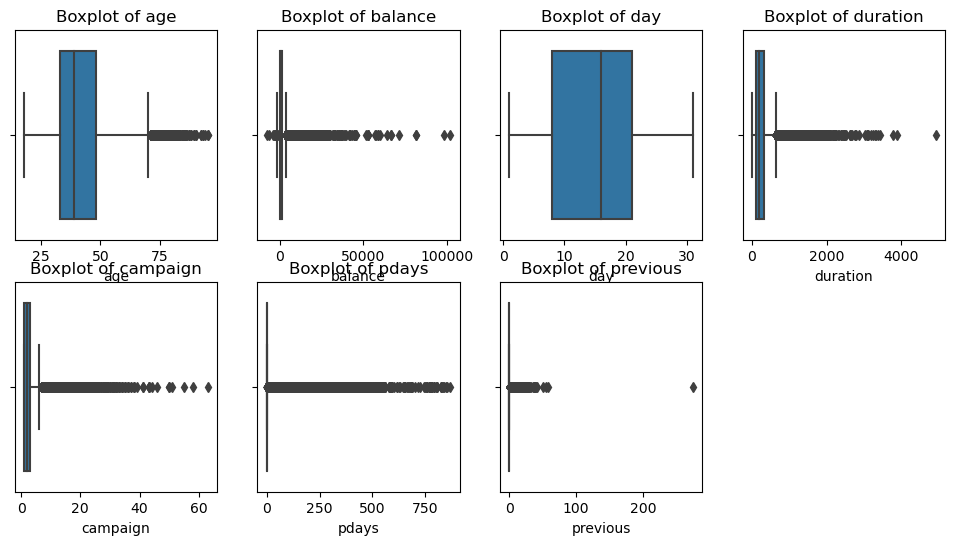

In [4]:
# Section 2b

 # only work with the numerical fields
num_features = df.select_dtypes(include=[np.number])
# Create boxplots for numeric features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    

# Detect outliers using the IQR method
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
# Deleting rows containing outliers
df = df.drop(outliers.index)




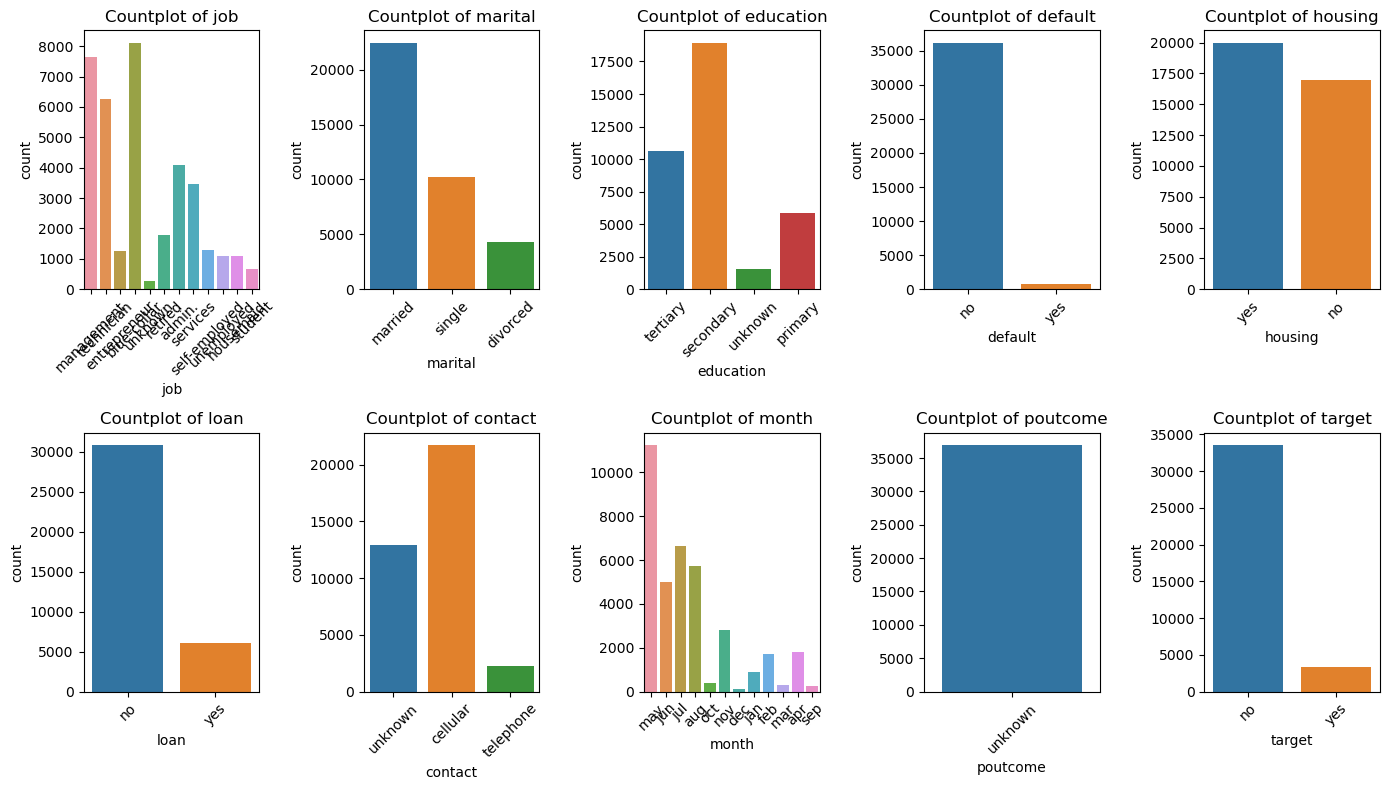

In [5]:
# 2c

# c. For categorical features, draw countplot

categorical_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 5, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observations:
# - Most clients have jobs in the 'admin.' and 'bluecollar' categories.
# - The majority of clients are 'married'.
# - 'High.school' and 'university.degree' are the most common education levels.
# - 'default' is mostly 'no' for clients.
# - There are more clients with 'housing' loans than without.
# - Few clients have a 'personal loan'.
# - 'Cellular' is the most common contact method.
# - 'May' and 'Jul' are the months with the highest number of contacts.
# - The 'poutcome' feature indicates that most clients had a 'nonexistent' outcome in the previous campaign.
# - The 'target' feature is imbalanced, with more 'no' values.



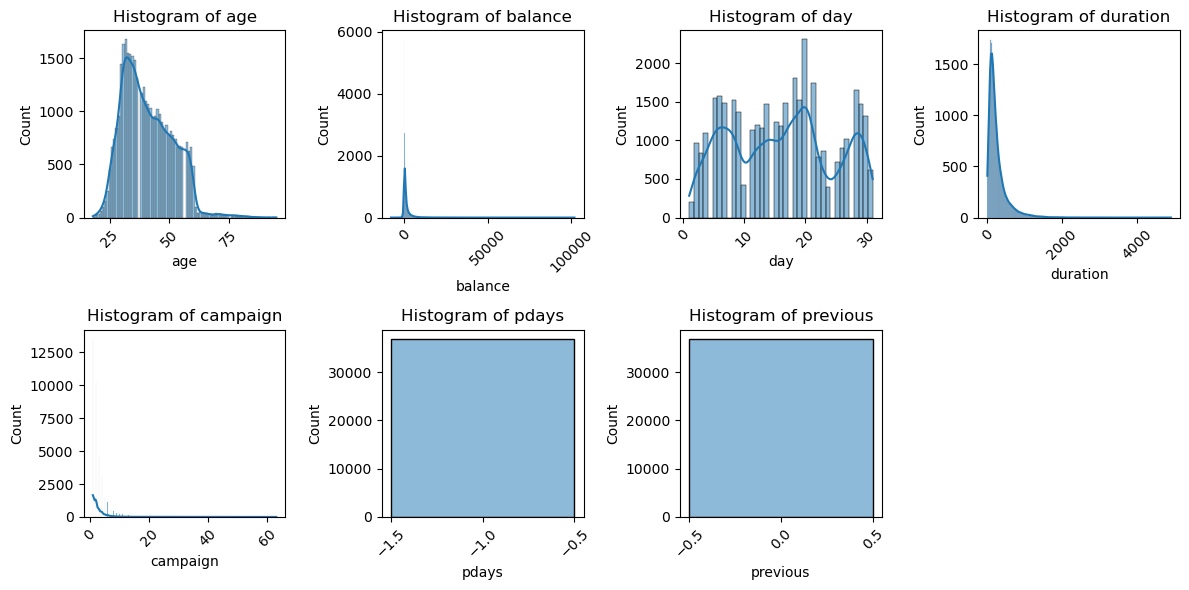

ValueError: Boolean array expected for the condition, not int64

In [6]:
#2d




# d. For numeric features, draw a histogram and check skewness
plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compute skewness for numeric features
skewness = df[num_features].skew()
print("Skewness of numeric features:")
print(skewness)

# Observations:
# - Some numeric features have right-skewed distributions, e.g., 'age', 'balance', 'campaign'.
# - Skewness can affect model performance, so we may need to apply transformations like log or square root.



In [ ]:
# 3a Come up with scatter plot with hue parameter. Write your observations from the plot.

# Create a scatter plot using Seaborn
sns.scatterplot(data=df, x='age', y='balance', hue='target')

# Set the title of the plot
plt.title("Scatter Plot of Age vs. Balance with Target Hue")

# Display the plot
plt.show()


In [ ]:
# 3b Compute correlation among independent features and demonstrate it using heatmap

# Compute the correlation matrix for numeric columns in DataFrame 'df'
correlation_matrix = df.corr(numeric_only=True)

# Create a new figure with a specified size (10 units wide, 8 units tall)
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn, visualizing the correlation matrix
# - 'annot=True' displays the correlation values inside the heatmap cells
# - 'cmap' specifies the color map to be used for coloring the cells
# - 'linewidths' sets the width of the lines that divide cells in the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set the title of the plot
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [ ]:
# 3c Apply any scaling method to at least two independent features.


# Create an instance of StandardScaler
scaler = StandardScaler()

# Scaling 'age' and 'balance' columns
# We are going to standardize (z-score normalize) the 'age' and 'balance' columns in our DataFrame.
# Standardization scales the data so that it has a mean of 0 and a standard deviation of 1.
# This process can be useful when working with machine learning algorithms that are sensitive to the scale of input features.
df[['age', 'balance']] = scaler.fit_transform(df[['age', 'balance']])


In [ ]:
# 3d Convert categorical features into numeric ones using appropriate encoding techniques.

# Create an instance of LabelEncoder , which will be used to encode categorical values into numerical labels.
label_encoder = LabelEncoder()

# Select all columns in the DataFrame that have data type 'object', indicating categorical features.
categorical_features = df.select_dtypes(include=[object])

# Iterate through each categorical column in the DataFrame.
for column in categorical_features.columns:
    # Apply label encoding to the current column using the LabelEncoder.
    df[column] = label_encoder.fit_transform(df[column])
df.dtypes


In [ ]:
# 4 Compute correlation of each independent feature with dependent variable ‘target’. Select seven most important independent features from the set.

# Calculate the absolute correlation between all numeric columns and the 'target' column
correlation_with_target = df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)

# Select the seven most important independent features (excluding 'target' itself)
top_independent_features = correlation_with_target[1:8]

# Print the selected features and their correlation values
print("Top Independent Features and Their Correlation with Target:")
print(top_independent_features)

In [ ]:
# 5 Consider ‘target’ column is prediction variable. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 7 features.

# Separate the dataset into independent variables (X) and the target variable (y)
X = df.drop('target', axis=1)  # Independent features
y = df['target']  # Target variable

# Initialize SelectKBest with the f_classif scoring function (use appropriate score function for your data)
k_best = SelectKBest(score_func=f_classif, k=7)  # Select the top 7 features

# Fit and transform the feature selection on the dataset
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)

# Create a new DataFrame with the selected features
selected_features_df = X.iloc[:, selected_feature_indices]

# Display the selected features
print("Selected Features:")
print(selected_features_df.columns)
